**Домашняя работа «Оценка точности модели, переобучение, регуляризация»**

**Цель:** \
закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall. \
**Описание задания:** \
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

1. **Преобразуйте данные: \
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;\
b. закодируйте категориальные переменные числовыми значениями по необходимости**


In [477]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [478]:
athletes = pd.read_csv('athletes.csv')
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [479]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


**Заполнение пропусков**

Есть пропущенные значения в переменныйх рост и вес. Попробуем исходя из пола и вида спорта дополнить данные средними значениями.

Заполним сначала для женщин.

In [480]:
athletes['sport'][(athletes['sex'] == 'female')&(athletes['weight'].isnull())].value_counts()

athletics       75
boxing          36
aquatics        20
handball        14
cycling          7
rowing           6
badminton        5
sailing          4
canoe            4
golf             4
equestrian       3
table tennis     3
shooting         3
tennis           3
football         2
volleyball       2
rugby sevens     2
taekwondo        2
gymnastics       1
basketball       1
archery          1
wrestling        1
Name: sport, dtype: int64

In [481]:
avg_ath_female = round(athletes['weight'][(athletes['sport'] == 'athletics')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].notnull())].mean(), 1)
avg_ath_female                

60.2

In [482]:
athletes['weight'][(athletes['sport'] == 'athletics')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = avg_ath_female

<ipython-input-482-3626c1cd2348>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes['weight'][(athletes['sport'] == 'athletics')&


In [483]:
avg_box_female = round(athletes['weight'][(athletes['sport'] == 'boxing')&
                      (athletes['sex'] == 'female')&
                      (athletes['weight'].notnull())].mean(), 1)
avg_box_female                

nan

Все данные по весу женщин боксёрш пропущены (я бы тоже попбоялась спрашивать)).

In [484]:
avg_aqua_female = round(athletes['weight'][(athletes['sport'] == 'aquatics')&
                      (athletes['sex'] == 'female')&
                      (athletes['weight'].notnull())].mean(), 1)
avg_aqua_female

62.3

In [485]:
athletes['weight'][(athletes['sport'] == 'aquatics')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = avg_aqua_female

<ipython-input-485-54a9dce64fe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes['weight'][(athletes['sport'] == 'aquatics')&


In [486]:
avg_hb_female = round(athletes['weight'][(athletes['sport'] == 'handball')&
                      (athletes['sex'] == 'female')&
                      (athletes['weight'].notnull())].mean(), 1)
avg_hb_female

70.8

In [487]:
athletes['weight'][(athletes['sport'] == 'handball')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = avg_hb_female

<ipython-input-487-1d31f146e31a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes['weight'][(athletes['sport'] == 'handball')&


In [488]:
athletes['weight'][(athletes['sport'] == 'cycling')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'cycling')&
                                                                            (athletes['sex'] == 'female')&
                                                                            (athletes['weight'].notnull())].mean(), 1)

<ipython-input-488-89c165434b27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes['weight'][(athletes['sport'] == 'cycling')&


In [489]:
athletes['weight'][(athletes['sport'] == 'rowing')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'rowing')&
                                                                              (athletes['sex'] == 'female')&
                                                                              (athletes['weight'].notnull())].mean(), 1)


<ipython-input-489-603cf01d973f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes['weight'][(athletes['sport'] == 'rowing')&


In [490]:
athletes['weight'][(athletes['sport'] == 'badminton')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'badminton')&
                                                                              (athletes['sex'] == 'female')&
                                                                              (athletes['weight'].notnull())].mean(), 1)


<ipython-input-490-0ba518f24641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes['weight'][(athletes['sport'] == 'badminton')&


In [ ]:
athletes['weight'][(athletes['sport'] == 'canoe')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'canoe')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'golf')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'golf')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'sailing')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'sailing')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'tennis')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'tennis')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'shooting')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'shooting')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'table tennis')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'table tennis')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'equestrian')&
                   (athletes['sex'] == 'female')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'equestrian')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['weight'].notnull())].mean(), 1)

In [492]:
athletes['sport'][(athletes['sex'] == 'female')&(athletes['weight'].isnull())].value_counts()

boxing          36
rugby sevens     2
volleyball       2
football         2
taekwondo        2
basketball       1
gymnastics       1
archery          1
wrestling        1
Name: sport, dtype: int64

Заполним пропуски по росту для женщин

In [493]:
athletes['sport'][(athletes['sex'] == 'female')&(athletes['height'].isnull())].value_counts()

athletics       77
aquatics        21
rowing           6
cycling          5
table tennis     4
sailing          4
canoe            3
rugby sevens     3
tennis           3
football         2
equestrian       2
golf             2
volleyball       1
judo             1
badminton        1
shooting         1
archery          1
wrestling        1
taekwondo        1
Name: sport, dtype: int64

In [ ]:
athletes['height'][(athletes['sport'] == 'athletics')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'athletics')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'aquatics')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'aquatics')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'rowing')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'rowing')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'cycling')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'cycling')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'table tennis')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'table tennis')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'sailing')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'sailing')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'canoe')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'canoe')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'rugby sevens')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'rugby sevens')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'tennis')&
                   (athletes['sex'] == 'female')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'tennis')&
                                                          (athletes['sex'] == 'female')&
                                                          (athletes['height'].notnull())].mean(), 1)


In [495]:
athletes['sport'][(athletes['sex'] == 'female')&(athletes['height'].isnull())].value_counts()

football      2
equestrian    2
golf          2
volleyball    1
judo          1
badminton     1
shooting      1
archery       1
wrestling     1
taekwondo     1
Name: sport, dtype: int64

Тоже самое сделаем для мужчин

In [496]:
athletes['sport'][(athletes['sex'] == 'male')&(athletes['weight'].isnull())].value_counts()

boxing          250
athletics        88
aquatics         26
football         26
cycling          16
judo             12
shooting          7
rowing            6
sailing           4
equestrian        4
gymnastics        4
badminton         3
basketball        3
wrestling         3
tennis            2
archery           1
fencing           1
taekwondo         1
golf              1
triathlon         1
rugby sevens      1
Name: sport, dtype: int64

In [497]:
round(athletes['weight'][(athletes['sport'] == 'boxing')&
                        (athletes['sex'] == 'male')&
                        (athletes['weight'].notnull())].mean(), 1)

nan

Мужчины боксёры не хотят признаваться, сколько весят тоже. К тому же у них разные весовые категории.

Возьмём средние значения веса из схожего вида спорта по комплекции: дзюдо

In [498]:
round(athletes['weight'][(athletes['sport'] == 'judo')&
                         (athletes['sex'] == 'male')&
                         (athletes['weight'].notnull())].mean(), 1)

84.6

In [ ]:
athletes['weight'][(athletes['sport'] == 'boxing')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'judo')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)

In [ ]:
athletes['weight'][(athletes['sport'] == 'athletics')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'athletics')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'aquatics')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'aquatics')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'football')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'football')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'cycling')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'cycling')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'judo')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'judo')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'shooting')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'shooting')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'rowing')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'rowing')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'sailing')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'sailing')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'equestrian')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'equestrian')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)
athletes['weight'][(athletes['sport'] == 'gymnastics')&
                   (athletes['sex'] == 'male')&
                   (athletes['weight'].isnull())] = round(athletes['weight'][(athletes['sport'] == 'gymnastics')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['weight'].notnull())].mean(), 1)

In [501]:
athletes['sport'][(athletes['sex'] == 'male')&(athletes['weight'].isnull())].value_counts()

badminton       3
basketball      3
wrestling       3
tennis          2
fencing         1
archery         1
taekwondo       1
golf            1
triathlon       1
rugby sevens    1
Name: sport, dtype: int64

In [502]:
athletes['sport'][(athletes['sex'] == 'male')&(athletes['height'].isnull())].value_counts()

athletics     90
aquatics      28
cycling       16
boxing        11
judo           9
football       8
rowing         6
shooting       6
sailing        4
equestrian     4
wrestling      2
tennis         2
archery        1
fencing        1
golf           1
triathlon      1
badminton      1
Name: sport, dtype: int64

In [ ]:
athletes['height'][(athletes['sport'] == 'athletics')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'athletics')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'aquatics')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'aquatics')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'cycling')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'cycling')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'boxing')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'boxing')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'judo')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'judo')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'football')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'football')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'rowing')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'rowing')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'shooting')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'shooting')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'sailing')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'sailing')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)
athletes['height'][(athletes['sport'] == 'equestrian')&
                   (athletes['sex'] == 'male')&
                   (athletes['height'].isnull())] = round(athletes['height'][(athletes['sport'] == 'equestrian')&
                                                          (athletes['sex'] == 'male')&
                                                          (athletes['height'].notnull())].mean(), 1)

In [504]:
athletes['sport'][(athletes['sex'] == 'male')&(athletes['height'].isnull())].value_counts()

wrestling    2
tennis       2
fencing      1
archery      1
golf         1
triathlon    1
badminton    1
Name: sport, dtype: int64

In [505]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11516 non-null  float64
 6   weight       11473 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Удалим оставшиеся пустые значения.

In [506]:
athletes.dropna(inplace=True)

In [507]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11465 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11465 non-null  int64  
 1   name         11465 non-null  object 
 2   nationality  11465 non-null  object 
 3   sex          11465 non-null  object 
 4   dob          11465 non-null  object 
 5   height       11465 non-null  float64
 6   weight       11465 non-null  float64
 7   sport        11465 non-null  object 
 8   gold         11465 non-null  int64  
 9   silver       11465 non-null  int64  
 10  bronze       11465 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


Преобразуем категорию дата рождения в возраст

In [508]:
from datetime import datetime, date

def age(born):
    '''Функция подсчитывает возраст по дате рождения'''

    born = datetime.strptime(born, "%m/%d/%y").date()
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
athletes['age'] = athletes['dob'].apply(age)

In [509]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,53
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,36
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,30
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,32
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,32


Назначим предикторы и целевую переменную. Переведём категориальные переменные в количетвенные, в том числе и целевую переменную 'sex'.

In [510]:
X = pd.get_dummies(athletes.loc[:, ['nationality', 'sport', 'height','weight','gold', 'silver', 'bronze', 'age']])
X.head()

,height,weight,gold,silver,bronze,age,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,53,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,32,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [511]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [512]:
le.fit(athletes['sex'])

LabelEncoder()

In [513]:
le.classes_

array(['female', 'male'], dtype=object)

In [514]:
le.transform(['male', 'female', 'male'])

array([1, 0, 1])

In [515]:
y = pd.Series (data = le.transform(athletes['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

Стандартизируем данные и назначим модель

In [516]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000000))

2. **Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.**

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True , stratify = y, test_size=0.2, random_state=42)

In [518]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [519]:
predictions = model.predict_proba(X_test)

In [520]:
df_compare = pd.DataFrame ([y_test.values, y_pred]).T
df_compare.columns = ['income', 'target']
df_compare

,income,target
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
2288,0,0
2289,1,1
2290,0,0
2291,1,1


In [521]:
model.score(X_test, y_test)

0.8320976886175316

3. **Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.**

In [522]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [523]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

Text(0.5, 1.0, 'ROC кривая на основе библиотечных данных')

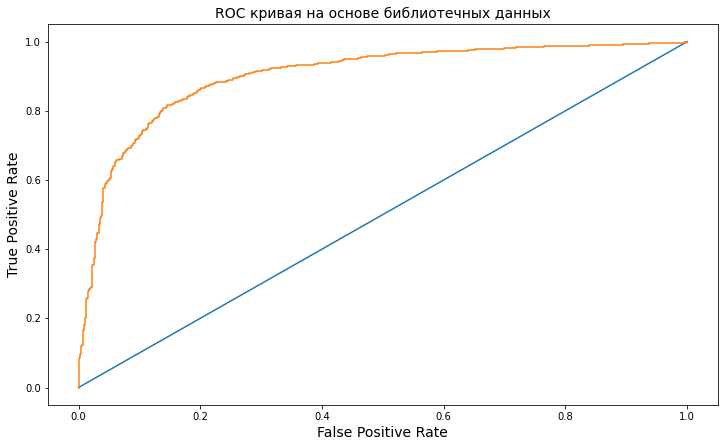

In [524]:
diag = [0.0, 1.0]
plt.plot(diag, diag)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('ROC кривая на основе библиотечных данных', fontsize = 14)

4. **Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.**

In [525]:
from sklearn.metrics import roc_auc_score

In [526]:
roc_auc_score(y_test, predictions[:, 1])

0.9005557733551646

5. **Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [527]:
thresholds = np.arange(0, 1, 0.001)

In [528]:
my_fpr = []
my_tpr = []
pr = []
re = []

for threshold in thresholds:
    y_pred = np.where(predictions[:, 1] >= threshold, 1, 0)

    fp = np.sum((y_pred == 1) & (y_test == 0))
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))

    my_fpr.append(fp / (fp + tn))
    my_tpr.append(tp / (tp + fn))

    pr.append(tp / (tp + fp))
    re.append(tp / (tp + fn))


Text(0.5, 1.0, 'ROC кривая, построенная на основе FPR и TPR, вычисленных "вручную"')

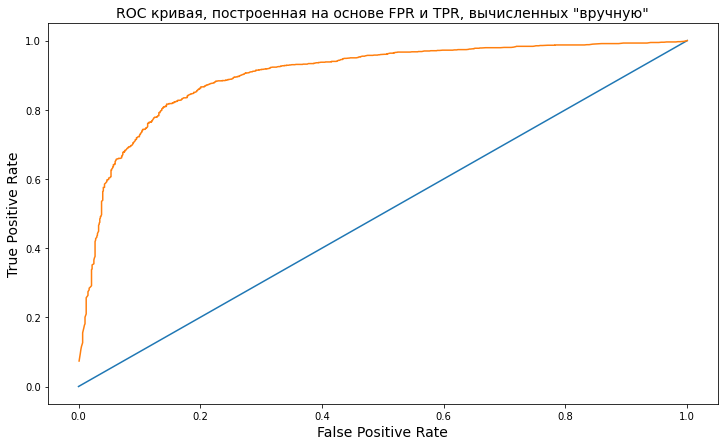

In [529]:
diag = [0.0, 1.0]
plt.plot(diag, diag)

plt.plot(my_fpr, my_tpr)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('ROC кривая, построенная на основе FPR и TPR, вычисленных "вручную"', fontsize = 14)

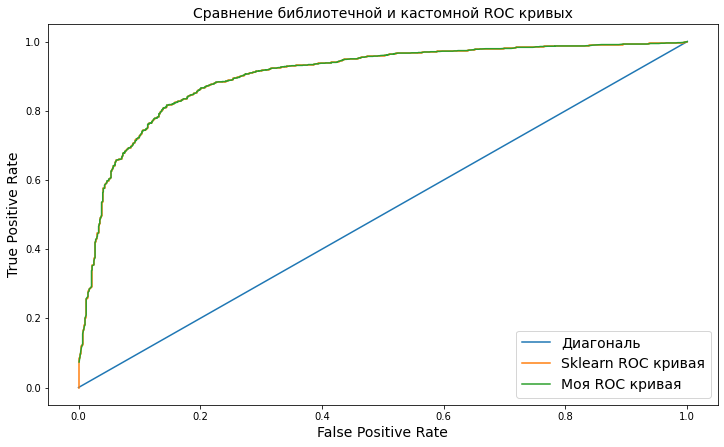

In [530]:
diag = [0.0, 1.0]
plt.plot(diag, diag)

plt.plot(fpr, tpr)
plt.plot(my_fpr, my_tpr)

plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)

plt.legend(['Диагональ','Sklearn ROC кривая','Моя ROC кривая'], fontsize = 14)

plt.title('Сравнение библиотечной и кастомной ROC кривых', fontsize = 14)
plt.show()

**Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.**

Text(0.5, 1.0, 'Precision - Recall')

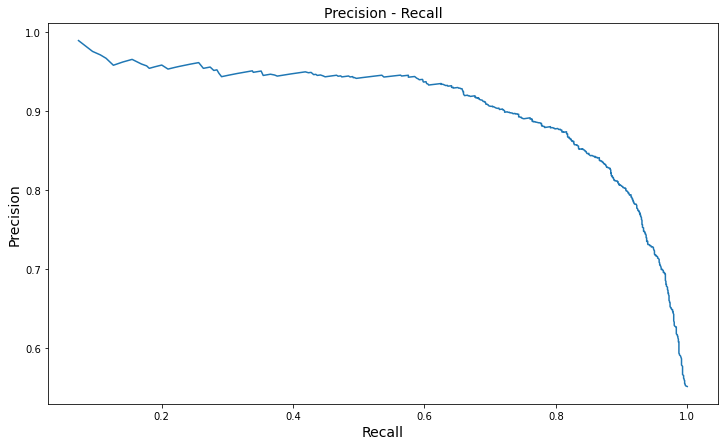

In [531]:
plt.plot(re, pr)
plt.ylabel('Precision', fontsize = 14)
plt.xlabel('Recall', fontsize = 14)
plt.title('Precision - Recall', fontsize = 14)

Text(0.5, 1.0, 'Precision - Threshold')

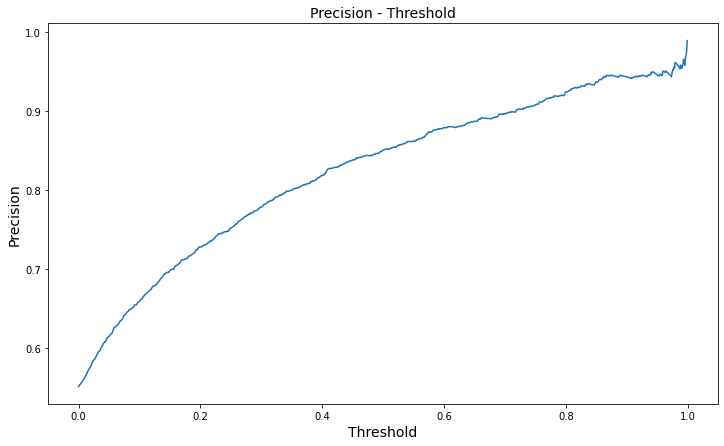

In [532]:
plt.plot(thresholds, pr)
plt.ylabel('Precision', fontsize = 14)
plt.xlabel('Threshold', fontsize = 14)
plt.title('Precision - Threshold', fontsize = 14)

Text(0.5, 1.0, 'Recall - Threshold')

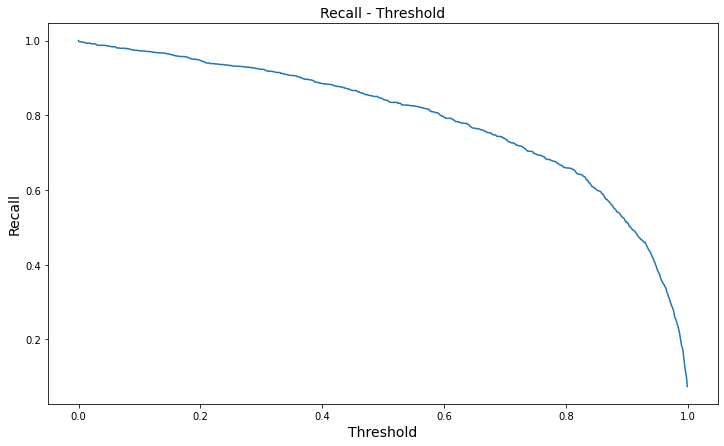

In [533]:
plt.plot(thresholds, re)
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Threshold', fontsize = 14)
plt.title('Recall - Threshold', fontsize = 14)

**Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.**

In [534]:
def my_roc_auc(fpr, tpr):
    '''Функция приблизительно считает площадь 
    фигуры под кривой как сумму площадей фигур'''
    
    # сортируем значения, чтобы двигаться от начала кривой
    fpr.sort()
    tpr.sort()

    roc_auc = 0
    prev_fpr = 0
    prev_tpr = 0

    for i in range(len(fpr)):
        if i == 1:
            # считаем площадь треугольника, один из углов которого находится в точке [0,0]
            roc_auc = (tpr[i] - tpr[i-1]) * (fpr[i] - fpr[i-1]) / 2

        if i > 1:
            # считаем площади треугольников и прямоугольников и суммируем
            roc_auc += ((tpr[i] - tpr[i-1]) * (fpr[i] - fpr[i-1]) / 2) + (tpr[i] * (fpr[i] - fpr[i-1]))

    return roc_auc

In [535]:
my_roc_auc(my_fpr, my_tpr)

0.900926288925274

9. **Сформулируйте выводы по проделанной работе:\
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?\
b. *может ли ROC-кривая проходить ниже диагонали?**

a. Исходя из обученных метрик модель хороша. Точность и полнота